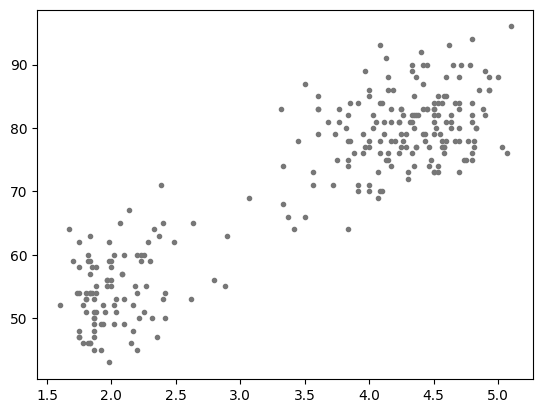

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def loadOF():
    data = []
    with open("old-faithful.txt", "r") as f:
        lines = f.readlines()[1:]
        for line in lines:
            line_tokens = line.split()
            data.append([float(line_tokens[1]), int(line_tokens[2])])
    
    return data
        
old_faithful = np.array(loadOF())

plt.scatter(old_faithful[:,0], old_faithful[:,1], color="#777", marker=".")

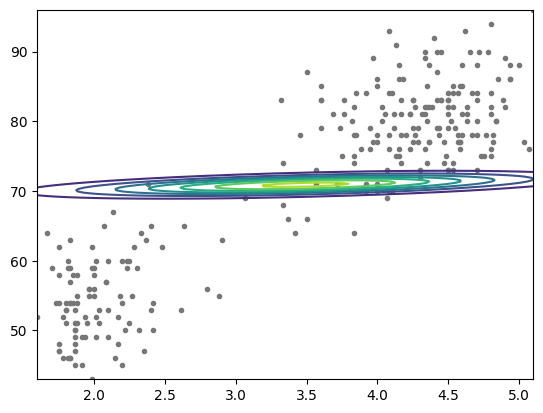

In [2]:
def visualize_data(dataset):
    df = pd.DataFrame(dataset)
    stats = df.describe()
    
    x_min, x_max = stats[0]["min"], stats[0]["max"]
    y_min, y_max = stats[1]["min"], stats[1]["max"]
    
    mu = np.array([[stats[0]["mean"]], [stats[1]["mean"]]])
    cov = np.array([[1,0.5],[0.5,1]])
    
    fig, ax = plot_2D_gaussian(mu, cov, [x_min, x_max], [y_min, y_max])
    ax.scatter(dataset[:,0], dataset[:,1], color="#777", marker=".")

def plot_2D_gaussian(mu, cov, x_lims, y_lims):
    x = np.linspace(x_lims[0], x_lims[1], 300)
    y = np.linspace(y_lims[0], y_lims[1], 300)
    X,Y = np.meshgrid(x,y)
    XY = np.stack((X,Y), axis=-1)
    XY = np.expand_dims(XY, axis=-1)

    det_cov = np.linalg.det(cov)
    cov_inv = np.linalg.inv(cov)
    Z = (2*np.pi)**(-1)*(det_cov)**(-1/2)*np.exp(-(1/2)*np.transpose((XY-mu), (0,1,3,2))@cov_inv@(XY-mu))
    Z = np.squeeze(Z)

    fig, ax = plt.subplots()
    mvg_plot = ax.contour(X,Y,Z)
    
    return fig, ax

# mu needs to be a vector not a sequence
visualize_data(old_faithful)